# "Classifiez automatiquement des biens de consommation"
_NLP Cleaning Notebook_

## 0 Preliminaries

### 0.0 Importing Packages and Modules

Checking whether the notebook is on Colab or PC

In [394]:
import sys
is_colab = 'google.colab' in sys.modules
is_colab, sys.executable

(True, '/usr/bin/python3')

Mounting my Drive if on Colab

In [395]:
if is_colab==True:
    from google.colab import files, output, drive
    drive.mount('/gdrive')
    %cd /gdrive
    print("You're on Google Colab")
else:
    print("You're on a PC")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive
You're on Google Colab


Installations and importations required in the virtual environment.

In [396]:
# import os
# if os.getcwd()!='/gdrive/My Drive/--DATA SCIENCE/PROJET6/NOTEBOOKS':
#     os.chdir('/gdrive/My Drive/--DATA SCIENCE/PROJET6/NOTEBOOKS')

In [397]:
import os
if is_colab==True:
    if os.getcwd()!='/gdrive/My Drive/--DATA SCIENCE/PROJET6/NOTEBOOKS':
        os.chdir('/gdrive/My Drive/--DATA SCIENCE/PROJET6/NOTEBOOKS')
else:
    if not (os.path.exists(os.getcwd()+'/requirements_cleaning_eda.txt') \
                     and os.path.exists(os.getcwd()+'/P6_functions.py')):
        print("ERROR: Make sure 'P6_functions.py' and \
'requirements_cleaning_eda.txt' are in the current working directory")

!pip install -r requirements_cleaning_eda.txt
from P6_functions import *

Installations (creating the requirements file)

In [398]:
# !pip install gtts
!pip install wikipedia2vec==0.2.2

In [399]:
!pip freeze > requirements_cleaning_eda.txt

Importation of modules and packages. 

In [400]:
import io

import string

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor']='w'

# import warnings
# warnings.filterwarnings('ignore')

Setting pandas display options.

In [401]:
dictPdSettings = {'display.max_rows': 500, 'display.width': 100,
                  'display.max_colwidth': 100,
                  'display.float_format': lambda x: '%.2f' % x}
for k,v in dictPdSettings.items():
  pd.set_option(k,v)

To play audio text-to-speech during execution.

In [402]:
from IPython.display import Audio
from gtts import gTTS

def speak(text, lang='en'):
    with io.BytesIO() as f:
        gTTS(text=text, lang=lang).write_to_fp(f)
        f.seek(0)
        return Audio(f.read(), autoplay=True)

In [403]:
speak('Packages and modules successfully imported')

### 0.1 Importing the datasets

Data is composed of 9 distinct .csv files we'll load in a dictionnary of dataframes.

In [404]:
if is_colab==True:
    # Importing database from my Drive
    print("Try to import data files in the notebook from myDrive...")
else:
    # Importing database from PC
    print("Try to import data files in the notebook from PC ('DATA')...")

df = pd.read_csv("../DATA/flipkart_com-ecommerce_sample_1050.csv",
                 sep=',', 
                 index_col = 'uniq_id',
                 encoding ='utf-8')

print("-----> Importation of .csv in the notebook: OK")

Try to import data files in the notebook from myDrive...
-----> Importation of .csv in the notebook: OK


In [405]:
speak('Datasets successfully imported')

### 0.2 First Overview

In [406]:
df.describe(include='all')

,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
count,1050,1050,1050,1050,1050,1049.00,1049.00,1050,1050,1050,1050,1050,712,1049
unique,149,1050,1050,642,1050,nan,nan,1050,2,1050,27,27,490,984
top,2015-12-01 12:40:44 +0000,http://www.flipkart.com/woven-terry-cotton-bath-towel/p/itmebryftxwdp4hy?pid=BTWEBRYFPZQDCGJC,ocean VGLASS0051,"[""Home Furnishing >> Bed Linen >> Blankets, Quilts & Dohars""]",CRNEYW6P8NZEK9EQ,nan,nan,0e1e3861d54a8a17b7b91f04071a4ca3.jpg,False,Buy Epresent Mfan 1 Fan USB USB Fan for Rs.219 online. Epresent Mfan 1 Fan USB USB Fan at best p...,No rating available,No rating available,Lapguard,"{""product_specification""=>[{""key""=>""Type"", ""value""=>""Mug""}, {""key""=>""Mug Capacity"", ""value""=>""5...."
freq,150,1,1,56,1,nan,nan,1,993,1,889,889,11,22
mean,NaN,NaN,NaN,NaN,NaN,2186.20,1584.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,7639.23,7475.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,35.00,35.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,555.00,340.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,999.00,600.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1999.00,1199.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Printing total nb and percentage of null:

In [407]:
display(print_null_pct(df))

nb of null:  341 
pct of null:  2.3


None

In [408]:
df.isna().sum()

crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

Browsing the content

In [409]:
df[df.isna().any(1)].sample(1)

,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
uniq_id,,,,,,,,,,,,,,
141ab1fbe0f943463d4971098647000c,2015-12-12 11:46:53 +0000,http://www.flipkart.com/mxofere-combo-rose-jasmine-almond-honey-aloevera-mixfruit-soap-kit/p/itm...,Mxofere Combo Rose Jasmine Almond Honey Aloevera Mixfruit Soap Kit,"[""Beauty and Personal Care >> Combos and Kits >> Mxofere Combos and Kits""]",CBKEBVA8UFVHZDEC,295.00,295.00,141ab1fbe0f943463d4971098647000c.jpg,False,Buy Mxofere Combo Rose Jasmine Almond Honey Aloevera Mixfruit Soap Kit for Rs.295 online. Mxofer...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Organic Type"", ""value""=>""Natural""}, {""key""=>""Number of Conte..."


In [410]:
df['product_specifications'][0]

'{"product_specification"=>[{"key"=>"Brand", "value"=>"Elegance"}, {"key"=>"Designed For", "value"=>"Door"}, {"key"=>"Type", "value"=>"Eyelet"}, {"key"=>"Model Name", "value"=>"Abstract Polyester Door Curtain Set Of 2"}, {"key"=>"Model ID", "value"=>"Duster25"}, {"key"=>"Color", "value"=>"Multicolor"}, {"key"=>"Length", "value"=>"213 cm"}, {"key"=>"Number of Contents in Sales Package", "value"=>"Pack of 2"}, {"key"=>"Sales Package", "value"=>"2 Curtains"}, {"key"=>"Material", "value"=>"Polyester"}]}'

In [411]:
df['description']

uniq_id
55b85ea15a1536d46b7190ad6fff8ce7    Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegan...
7b72c92c2f6c40268628ec5f14c6d590    Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Featur...
64d5d4a258243731dc7bbb1eef49ad74    Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa ...
d4684dcdc759dd9cdf41504698d737d8    Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet P...
6325b6870c54cd47be6ebfbffa620ec7    Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print C...
                                                                                   ...                                                 
958f54f4c46b53c8a0a9b8167d9140bc    Oren Empower Extra Large Self Adhesive Sticker (Pack of 2)\r\n                         Price: Rs...
fd6cbcc22efb6b761bd564c28928483c    Wall

## 1 Data extraction

### 1.1 Categories

Unfolding categories using the 'product_category_tree' colum

In [412]:
# sample checking
df['product_category_tree'][743]

'["Kitchen & Dining >> Containers & Bottles >> Bottles & Sippers >> Water bottle >> Nutcase Water bottle"]'

In [413]:
# determining the maximum tree depth of categories
ser_depth = df['product_category_tree'].apply(lambda x: x.count('>>'))
max_depth = ser_depth.max()
max_depth

6

In [414]:
# Converting the strings in 'product_category_tree' column in 6 categ columns

def str_cleaning(ind, my_str, name_level_cols):
    my_str = my_str.replace("[\"", "").replace("\"]", "")
    tab_str = my_str.split(">>")
    size_tab_str = len(tab_str)
    tup_str = tuple([tab_str[i].strip() if i<size_tab_str else "" \
                     for i in np.arange(max_depth) ])
    return tup_str

name_level_cols = ['cat_level_'+str(i) for i in np.arange(max_depth)]
ser_tuple = df['product_category_tree']\
    .apply(lambda s: str_cleaning(s.index, s, name_level_cols))
df_cat_level = pd.DataFrame([[a,'/'.join([a,b]),'/'.join([a,b,c]),
                              '/'.join([a,b,c,d]),'/'.join([a,b,c,d,e]),
                              '/'.join([a,b,c,d,e,f])] \
                             for a,b,c,d,e,f in ser_tuple.values],
                            columns=name_level_cols, index=df.index)

In [415]:
# printing number of categories in each level and a sample
display(df_cat_level.nunique(), df_cat_level.sample(3))

cat_level_0      7
cat_level_1     62
cat_level_2    243
cat_level_3    460
cat_level_4    596
cat_level_5    633
dtype: int64

,cat_level_0,cat_level_1,cat_level_2,cat_level_3,cat_level_4,cat_level_5
uniq_id,,,,,,
ead122f4b1da293eb2d719baf104dfc9,Beauty and Personal Care,Beauty and Personal Care/Body and Skin Care,Beauty and Personal Care/Body and Skin Care/Face Care,Beauty and Personal Care/Body and Skin Care/Face Care/Sunscreen,Beauty and Personal Care/Body and Skin Care/Face Care/Sunscreen/Lotus Sunscreen,Beauty and Personal Care/Body and Skin Care/Face Care/Sunscreen/Lotus Sunscreen/
2476ae5a5e045876aa08f5919cb3b91b,Home Furnishing,Home Furnishing/Floor Coverings,Home Furnishing/Floor Coverings/Carpets & Rugs,"Home Furnishing/Floor Coverings/Carpets & Rugs/M S Rugs Pink, Blue Wool Dhurrie (120 cm X 180 cm)","Home Furnishing/Floor Coverings/Carpets & Rugs/M S Rugs Pink, Blue Wool Dhurrie (120 cm X 180 cm)/","Home Furnishing/Floor Coverings/Carpets & Rugs/M S Rugs Pink, Blue Wool Dhurrie (120 cm X 180 c..."
d627a270302d23eef773d05ad01fd03c,Baby Care,Baby Care/Baby Bedding,Baby Care/Baby Bedding/Baby Bedsheets,Baby Care/Baby Bedding/Baby Bedsheets/Mahadev Handicrafts Baby Bedsheets,Baby Care/Baby Bedding/Baby Bedsheets/Mahadev Handicrafts Baby Bedsheets/Mahadev Handicrafts Cot...,Baby Care/Baby Bedding/Baby Bedsheets/Mahadev Handicrafts Baby Bedsheets/Mahadev Handicrafts Cot...


Let's see how much items are in each category

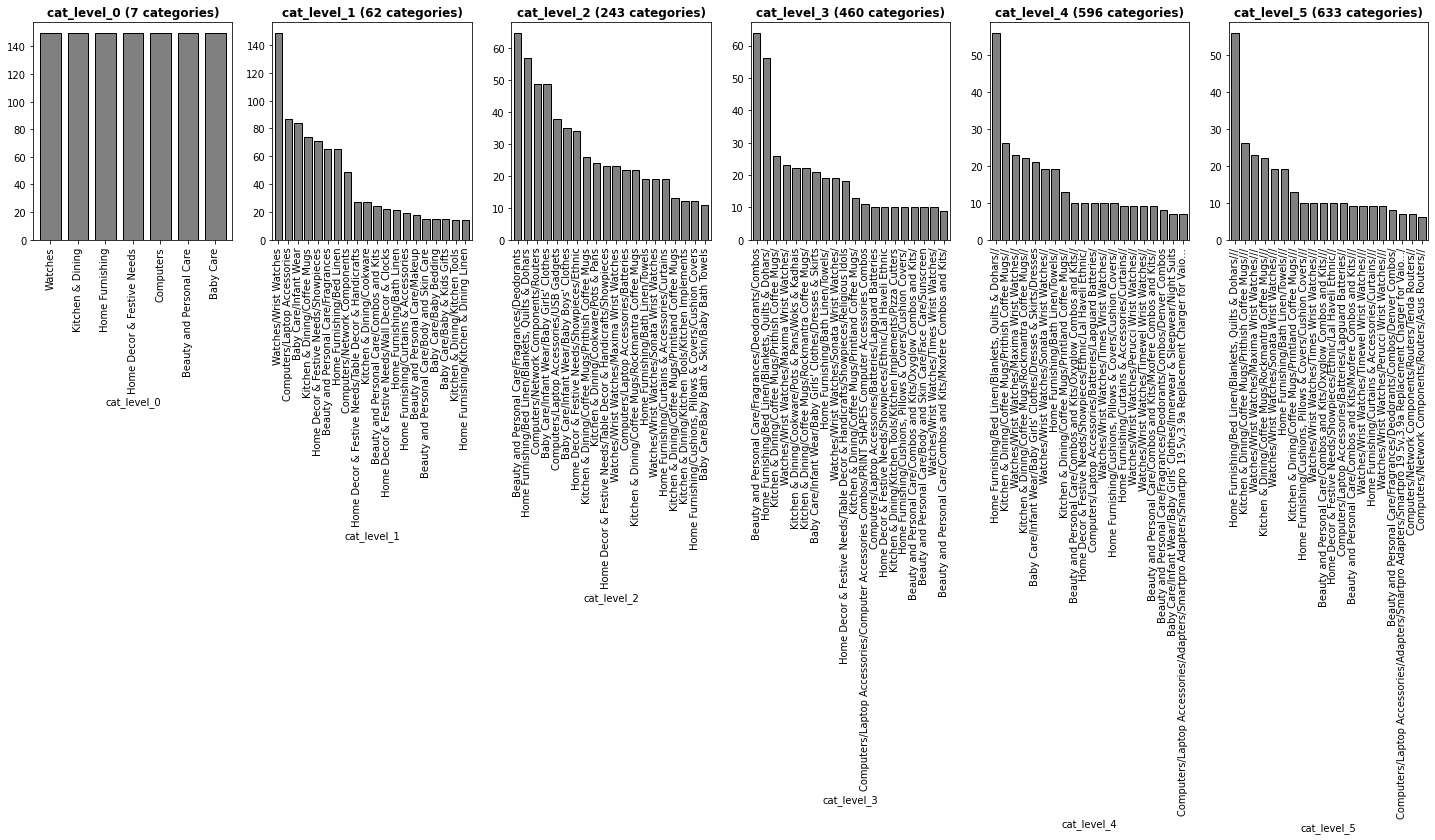

In [416]:
fig = plt.figure(figsize=(25,4))
for i, col in enumerate(df_cat_level.columns,1):
    ax = fig.add_subplot(1,len(df_cat_level.columns), i)
    ser = df_cat_level.groupby(col).size().sort_values(ascending=False)
    ser[0:20].plot.bar(width=0.75, color='grey', ec='k', ax=ax)
    ax.set_title(col+f' ({ser.shape[0]} categories)', fontweight='bold')

The only level that has a balanced set of items is level 0, with 7 categories.
Let's rename these 7 categories:

In [417]:
df_cat_level['cat_level_0'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

In [418]:
df_cat_level['category'] = \
    df_cat_level['cat_level_0'].replace({'Home Furnishing': 'Furnishing',
                                        'Baby Care': 'Baby', 
                                        'Watches': 'Watches',
                                        'Home Decor & Festive Needs': 'Decor',
                                        'Kitchen & Dining': 'Kitchen',
                                        'Beauty and Personal Care': 'Beauty',
                                        'Computers': 'Computers'})

### 1.2 Products descriptions

In [419]:
# extracting only useful data
df_desc_cat = pd.concat([df_cat_level['category'],
                         df[["product_name", "description"]]], axis=1)

In [420]:
df_desc_cat.head()

,category,product_name,description
uniq_id,,,
55b85ea15a1536d46b7190ad6fff8ce7,Furnishing,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegan..."
7b72c92c2f6c40268628ec5f14c6d590,Baby,Sathiyas Cotton Bath Towel,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Featur..."
64d5d4a258243731dc7bbb1eef49ad74,Baby,Eurospa Cotton Terry Face Towel Set,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa ..."
d4684dcdc759dd9cdf41504698d737d8,Furnishing,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet P...
6325b6870c54cd47be6ebfbffa620ec7,Furnishing,Jaipur Print Cotton Floral King sized Double Bedsheet,"Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print C..."


In [421]:
# creation of a corpus of all the descriptions
corpus = ' '.join(df_desc_cat['description'].values)
print("total nb of words in the whole corpus: ", len(corpus.split()))

total nb of words in the whole corpus:  80013


## 2 Whole corpus exploration

In [422]:
import nltk

In [423]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Frequency of words (with stopwords)

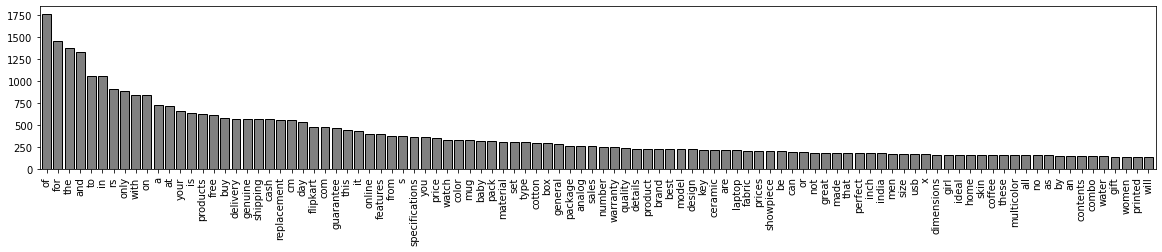

In [683]:
# tokenizing the words in the whole corpus
tokenizer = nltk.RegexpTokenizer(r'[a-z]+')
li_words = tokenizer.tokenize(corpus.lower())
# counting frequency of each word
ser_freq = pd.Series(nltk.FreqDist(li_words))
# plotting the most frequent words
ser_freq.sort_values(ascending=False)[0:100].plot.bar(width=0.8,
                                                            color='grey',
                                                            ec='k')
plt.gcf().set_size_inches(20,3)

In [684]:
english_sw = nltk.corpus.stopwords.words('english')
most_freq_sw = (ser_freq.sort_values(ascending=False)[0:36].index).tolist()
most_freq_sw = [s for s in most_freq_sw if s not in english_sw]
single_let_sw = list(string.ascii_lowercase)
single_let_sw = [s for s in single_let_sw if (s not in most_freq_sw) and\
                                             (s not in english_sw)]

#### Frequency of words without stopwords

In [685]:
# creating a list of stopwords...
sw = set()
# ...including the 36 most frequent words ...
most_freq = (ser_freq.sort_values(ascending=False)[0:36].index).tolist()
sw.update(most_freq)
print("Most frequent words added to stopwords: ", most_freq)
# ...including the single letters ...
single_letters = list(string.ascii_lowercase)
sw.update(single_letters)
# ... as well a known english stopwords from nltk package
sw.update(tuple(nltk.corpus.stopwords.words('english')))
print("Total number of stopwords in sw list: ", len(sw))

Most frequent words added to stopwords:  ['of', 'for', 'the', 'and', 'to', 'in', 'rs', 'only', 'with', 'on', 'a', 'at', 'your', 'is', 'products', 'free', 'buy', 'delivery', 'genuine', 'shipping', 'cash', 'replacement', 'cm', 'day', 'flipkart', 'com', 'guarantee', 'this', 'it', 'online', 'features', 'from', 's', 'specifications', 'you', 'price']
Total number of stopwords in sw list:  215


In [686]:
ser_freq_wo_sw = ser_freq.loc[[s for s in ser_freq.index if s not in sw]]

o---Total number of words: 46445
o---Words in decreasing order of frequency:
watch         330
color         328
mug           327
baby          320
pack          317
             ... 
showcasing      1
rural           1
fascinates      1
purposes        1
nightmares      1
Length: 5057, dtype: int64


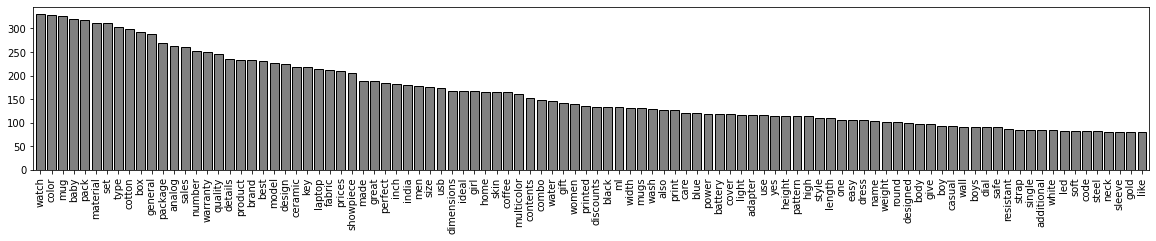

In [687]:
# plotting the most frequent words
print("o---Total number of words: {}\no---Words in decreasing order of\
 frequency:\n{}".format(ser_freq_wo_sw.sum(),
                        ser_freq_wo_sw.sort_values(ascending=False)))
ser_freq_wo_sw.sort_values(ascending=False)[0:100].plot.bar(width=0.8,
                                                            color='grey',
                                                            ec='k')
plt.gcf().set_size_inches(20,3)

#### Frequency of stems

In [430]:
## Lemmatization
# WordNetLemmatizer

In [688]:
from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer()
ser_freq_stems = pd.Series(ser_freq_wo_sw.values,
                           index=[stemmer.stem(s) for s in ser_freq_wo_sw.index])\
                   .to_frame().reset_index().groupby('index').sum()
ser_freq_stems = pd.Series(ser_freq_stems.iloc[:,0].values,
                           index = ser_freq_stems.index)

o---Total number of words: 46445
o---Words in decreasing order of frequency:
index
mug        457
design     401
color      380
watch      360
pack       342
          ... 
horizon      1
hop          1
smog         1
cvpc         1
sunflow      1
Length: 4062, dtype: int64


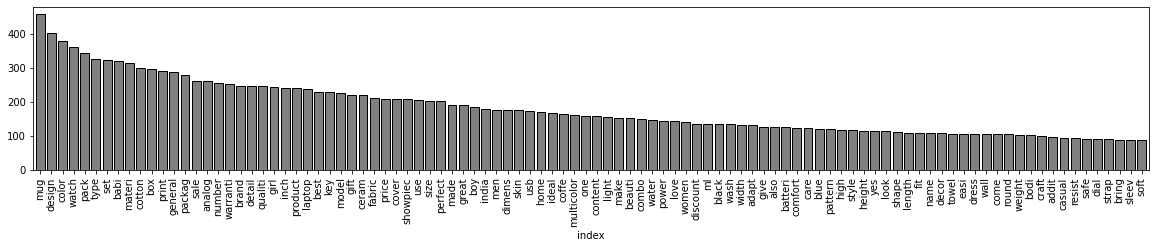

In [689]:
# plotting the most frequent stems
print("o---Total number of words: {}\no---Words in decreasing order of\
 frequency:\n{}".format(ser_freq_stems.sum(),
                        ser_freq_stems.sort_values(ascending=False)))
ser_freq_stems.sort_values(ascending=False)[0:100].plot.bar(width=0.8,
                                                            color='grey',
                                                            ec='k')
plt.gcf().set_size_inches(20,3)

## 3 Text pre-processing


### 3.1 Tokenization - stopwords cleaning - stemming

- regex selection of alphabetical data
- removing stopwords
- removing 36 most frequent words
- stemming

In [433]:
''' from a sentence, containing words (document):
- tokenizes the words if only composed of alphanumerical data,
- removes stopwords if list is given (stopwords)
- stems the words if stemmer given
NB: This pre-processing function can be used to prepare data for Word2Vec
'''
from nltk.stem.snowball import EnglishStemmer

def tokenize_clean(document, stopwords=None, stemmer=None):
    # tokenizing the words in each description
    tokenizer = nltk.RegexpTokenizer(r'[a-z]+')
    li_words = tokenizer.tokenize(document.lower())
    if stopwords is None: stopwords=[]
    # stemming and removing stopwords
    if stemmer is not None:
        li_words = [stemmer.stem(s) for s in li_words if s not in stopwords]
    else:
        # removing stopwords only
        li_words = [s for s in li_words if s not in stopwords]
    return li_words

In [434]:
from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer()
df_desc_cat['desc_token'] = \
    df_desc_cat['description'].apply(lambda x: tokenize_clean(x,
                                                              stopwords=sw,
                                                              stemmer=stemmer))

In [435]:
df_desc_cat['desc_token_joined'] = \
    df_desc_cat['desc_token'].apply(lambda x: ' '.join(x))

In [436]:
print(df_desc_cat.shape[0], "different descriptions")
df_desc_cat.head()

1050 different descriptions


,category,product_name,description,desc_token,desc_token_joined
uniq_id,,,,,
55b85ea15a1536d46b7190ad6fff8ce7,Furnishing,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegan...","[key, eleg, polyest, multicolor, abstract, eyelet, door, curtain, floral, curtain, eleg, polyest...",key eleg polyest multicolor abstract eyelet door curtain floral curtain eleg polyest multicolor ...
7b72c92c2f6c40268628ec5f14c6d590,Baby,Sathiyas Cotton Bath Towel,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Featur...","[sathiya, cotton, bath, towel, bath, towel, red, yellow, blue, bath, towel, machin, washabl, yes...",sathiya cotton bath towel bath towel red yellow blue bath towel machin washabl yes materi cotton...
64d5d4a258243731dc7bbb1eef49ad74,Baby,Eurospa Cotton Terry Face Towel Set,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa ...","[key, eurospa, cotton, terri, face, towel, set, size, small, height, inch, gsm, eurospa, cotton,...",key eurospa cotton terri face towel set size small height inch gsm eurospa cotton terri face tow...
d4684dcdc759dd9cdf41504698d737d8,Furnishing,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet P...,"[key, santosh, royal, fashion, cotton, print, king, size, doubl, bedsheet, royal, bedsheet, perf...",key santosh royal fashion cotton print king size doubl bedsheet royal bedsheet perfact wed gift ...
6325b6870c54cd47be6ebfbffa620ec7,Furnishing,Jaipur Print Cotton Floral King sized Double Bedsheet,"Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print C...","[key, jaipur, print, cotton, floral, king, size, doubl, bedsheet, cotton, jaipur, print, cotton,...",key jaipur print cotton floral king size doubl bedsheet cotton jaipur print cotton floral king s...


In [437]:
big_list = list(df_desc_cat['desc_token'].values)
all_terms = [s for sublist in big_list for s in sublist]
print("Total number of words in all the descriptions (with duplicates) :",
      len(all_terms))
print("Total number of words in all the descriptions (unique) :",
      len(set(all_terms)))

Total number of words in all the descriptions (with duplicates) : 46445
Total number of words in all the descriptions (unique) : 4062


### 3.2 Document-Term Matrices (BOW and TF-IDF)

#### Bag of words using CountVectorizer

In [717]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(stop_words = sw,
                      min_df = 1,
                      # max_df=100,
                      # max_features = 50,
                      )

CV_TD_mat = vec.fit_transform(df_desc_cat['desc_token_joined'])
print( "Created %d X %d document-term matrix" % (CV_TD_mat.shape[0],
                                                 CV_TD_mat.shape[1]) )

# Vocabulary of the document_term matrix
CV_voc = vec.get_feature_names()
print("Vocabulary has %d distinct terms" % len(CV_voc))

CV_TD_df = pd.DataFrame(CV_TD_mat.todense(),
             index=df_desc_cat.index, # each item
             columns=CV_voc) # each word

Created 1050 X 4057 document-term matrix
Vocabulary has 4057 distinct terms


In [718]:
# New Stopwords list generated because of CountVectorizer parameters
CV_sw = vec.stop_words_
print("Old stop-words list has %d entries" % len(sw) )
print("New stop-words list has %d entries" % len(CV_sw))

Old stop-words list has 215 entries
New stop-words list has 0 entries


Let's look at a representation of the categories on a projection of the data

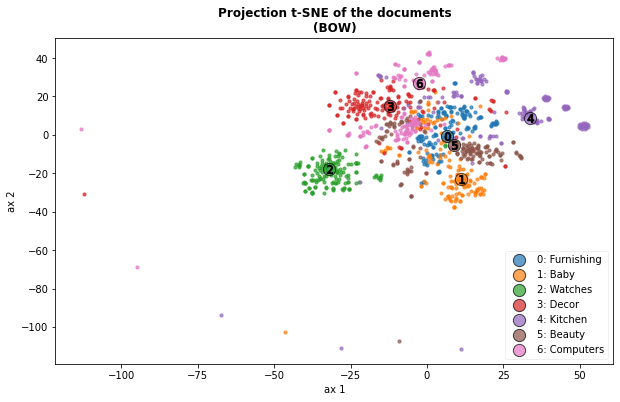

In [719]:
# BOW projection

ser_categories = pd.Series(df_desc_cat['category'].values, 
                           index=df_desc_cat.index,
                           name='Clust')

plot_projection(CV_TD_df, model=None, ser_clust=ser_categories,
                proj='t-SNE', size=10, legend_on=True,
                title="Projection t-SNE of the documents\n(BOW)",
                figsize=(10, 6), palette='tab10',
                fig=None, ax=None, random_state=14)

#### TF_IDF matrix using TfidfVectorizer

In [720]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(stop_words=sw,
                            min_df = 1)
TFIDF_TD_mat = tfidf_vec.fit_transform(df_desc_cat['desc_token_joined'])
print( "Created %d X %d TF-IDF-normalized document-term matrix"\
      % (TFIDF_TD_mat.shape[0], TFIDF_TD_mat.shape[1]) )

# Vocabulary of the document_term matrix
TFIDF_voc = tfidf_vec.get_feature_names()
print("Vocabulary has %d distinct terms" % len(TFIDF_voc))

TFIDF_TD_df = pd.DataFrame(TFIDF_TD_mat.todense(),
                           index=df_desc_cat.index, # each item
                           columns=TFIDF_voc) # each word

Created 1050 X 4057 TF-IDF-normalized document-term matrix
Vocabulary has 4057 distinct terms


In [721]:
# New Stopwords list genearated because of CountVectorizer parameters
TFIDF_sw = tfidf_vec.stop_words_
print("Old stop-words list has %d entries" % len(sw) )
print("New stop-words list has %d entries" % len(TFIDF_sw))

Old stop-words list has 215 entries
New stop-words list has 0 entries


Let's look at a representation of the categories on a projection of the data

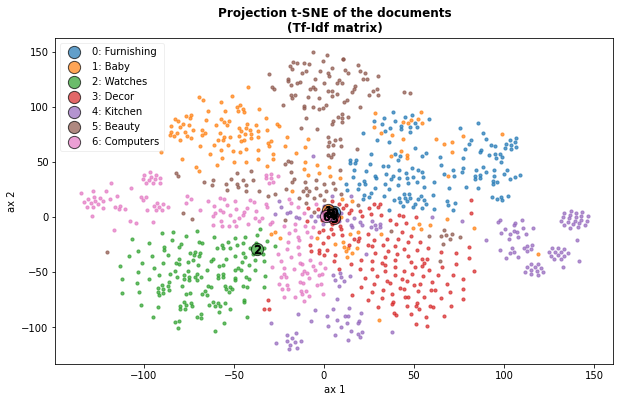

In [722]:
# TF-IDF projection

ser_categories = pd.Series(df_desc_cat['category'].values, 
                           index=df_desc_cat.index,
                           name='Clust')

plot_projection(TFIDF_TD_df, model=None, ser_clust=ser_categories,
                proj='t-SNE', size=10, legend_on=True,
                title="Projection t-SNE of the documents\n(Tf-Idf matrix)",
                figsize=(10, 6), palette='tab10',
                fig=None, ax=None, random_state=14)

### 3.3 Word embeddings

#### Training a Word2Vec model on the corpus (gensim)

In [442]:
from gensim.models.word2vec import Word2Vec

In [444]:
# ## Option 1: training a Word2Vec model on the whole corpus

# model = Word2Vec(df_corpus['tokenized_list'],
#                  size=300,
#                  window=20,
#                  min_count=2,
#                  workers=1,
#                  iter=100,
#                  sg=0)  #0: CBOW, 1:skip-gram)
# w2v_vocab = model.wv.vocab
# print( "Model has %d terms" % len(w2v_vocab))

## reload
# w2v_model = gensim.models.Word2Vec.load("w2v-model.bin")

## examples
# model.wv['britain'].shape, model.wv['britain'][:10]

#### Wiki2Vec embedding

Let's use a word embedding to get a smarter and smaller representation of our data.
We'll use a pre-trained Word2Vec model (our data are too small to train a model).

In [443]:
from wikipedia2vec import Wikipedia2Vec

In [445]:
## Option 2: using a pretrained model
# https://wikipedia2vec.github.io/wikipedia2vec/pretrained/


In [446]:
wiki2vec = Wikipedia2Vec.load("../DATA/enwiki_20180420_100d.pkl") # 100 dimensions

In [579]:
from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer()

In [734]:
# Vectorization of the descriptions prior to projection on Wiki2Vec

tf_idf_df, actu_sw = \
    compute_doc_terms_df(df_desc_cat['desc_token_joined'],
                         preproc_func= tokenize_clean,
                         preproc_func_params = {'stopwords': sw,
                                                'stemmer': None},
                         vec_params = {'min_df': 1,
                                    #    'max_df': 15,
                                       'stop_words': sw},
                         tfidf_on=True)

In [735]:
# Projection of the document_term matrix on the w2v matrix 

wiki2vec_emb_df = proj_term_doc_on_w2v(tf_idf_df, wiki2vec, print_opt=False)

Let's look at a representation of the categories on a projection of the data

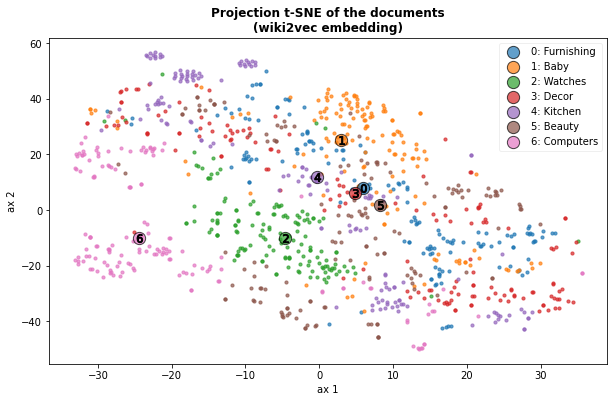

In [736]:
# tfidf_Wiki2Vec_emb projection

ser_categories = pd.Series(df_desc_cat['category'].values, 
                           index=df_desc_cat.index,
                           name='Clust')

plot_projection(wiki2vec_emb_df, model=None, ser_clust=ser_categories,
                proj='t-SNE', size=10, legend_on=True,
                title="Projection t-SNE of the documents\n(wiki2vec embedding)",
                figsize=(10, 6), palette='tab10',
                fig=None, ax=None, random_state=14)

## 4 Visualization of the vectorizations with respect to the known categories

In [784]:
'''


'params' are the arguments of the 'compute_doc_terms_df' function and
take the form (default settings):
    preproc_func=None,
    preproc_func_params=None,
    vec_params = {'min_df': 1},
    tfidf_on=False,
    print_opt=False
'''

from sklearn.metrics import silhouette_score

def plot_grid_proj_params(ser_desc, ser_clust, params, n_rows=1,
                          w2v=None, title=None, figsize=(20,10)): 

    n_cols = len(params)//n_rows + ((len(params)%n_rows)>0)*1

    fig = plt.figure()
    fig.set_size_inches(figsize)

    df_scores = pd.DataFrame()
    # Loops over the parameter to show the projections
    for i, param in enumerate(params,1):

        ax = fig.add_subplot(n_rows, n_cols, i)
        # Vectorization of the descriptions prior to projection on Wiki2Vec
        doc_term_df, actu_sw = compute_doc_terms_df(ser_desc, **param)

        # Projection of the document_term matrix on the w2v matrix
        if w2v is not None:
            doc_term_df = proj_term_doc_on_w2v(doc_term_df, w2v)

        # Computing scores
        silh = silhouette_score(doc_term_df, ser_clust)
        df_scores.loc[i-1,'silh'] = silh

        # tfidf_Wiki2Vec_emb projection
        plot_projection(doc_term_df, model=None, ser_clust=ser_clust,
                        proj='t-SNE', size=10, legend_on=True,
                        title="param set n°{}|silh.={:.2f}".format(i, silh),
                        fig=fig, ax=ax, random_state=14)
        
    if title:
        plt.suptitle(title, fontsize=16, fontweight='bold')
        plt.tight_layout(rect=(0,0,1,0.92))
    else:
        plt.tight_layout()
    plt.show()
    return df_scores

Document-terms matrices (BOW and TfIdf)

Range of min_df tested:
[ 0 12 24 36 48 60]


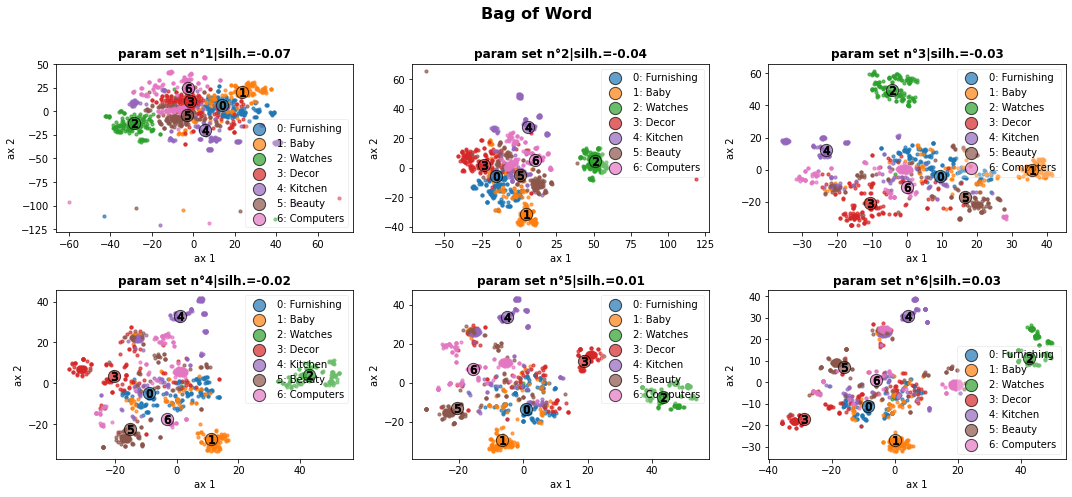

,0,1,2,3,4,5
silh,-0.07,-0.04,-0.03,-0.02,0.01,0.03


In [788]:
####### BOW: min_df#######
ser_categories = pd.Series(df_desc_cat['category'].values, 
                           index=df_desc_cat.index,
                           name='Clust')

# Generates a list of parameters dictionaries
min_df_range = (np.linspace(0,60,6)).astype('int')
params = []
for min_df in min_df_range:
    params.append({'vec_params': {'min_df': min_df, 'stop_words': sw},
                   'tfidf_on': False})

print(f"Range of min_df tested:\n{min_df_range}")
df_scores = plot_grid_proj_params(df_desc_cat['description'],
                                  ser_categories,
                                  params, n_rows=2,
                                  figsize=(15,7),
                                  w2v=None, title="Bag of Word")

display(df_scores.T)

Range of min_df tested:
[ 0 12 24 36 48 60]


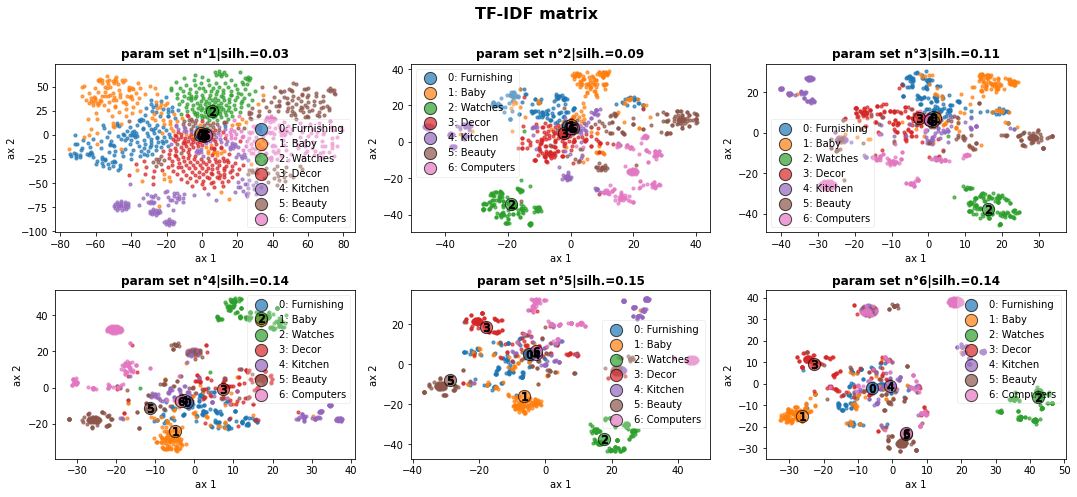

,0,1,2,3,4,5
silh,0.03,0.09,0.11,0.14,0.15,0.14


In [789]:
####### TF_IDF: min_df#######
ser_categories = pd.Series(df_desc_cat['category'].values, 
                           index=df_desc_cat.index,
                           name='Clust')

# Generates a list of parameters dictionaries
min_df_range = (np.linspace(0,60,6)).astype('int')
params = []
for min_df in min_df_range:
    params.append({'vec_params': {'min_df': min_df, 'stop_words': sw},
                   'tfidf_on': True})

print(f"Range of min_df tested:\n{min_df_range}")
df_scores = plot_grid_proj_params(df_desc_cat['description'],
                                  ser_categories,
                                  params, n_rows=2,
                                  figsize=(15,7),
                                  w2v=None, title='TF-IDF matrix')

display(df_scores.T)

Document-terms matrices (BOW and TfIdf) with W2V projection

Range of min_df tested:
[ 0 12 24 36 48 60]


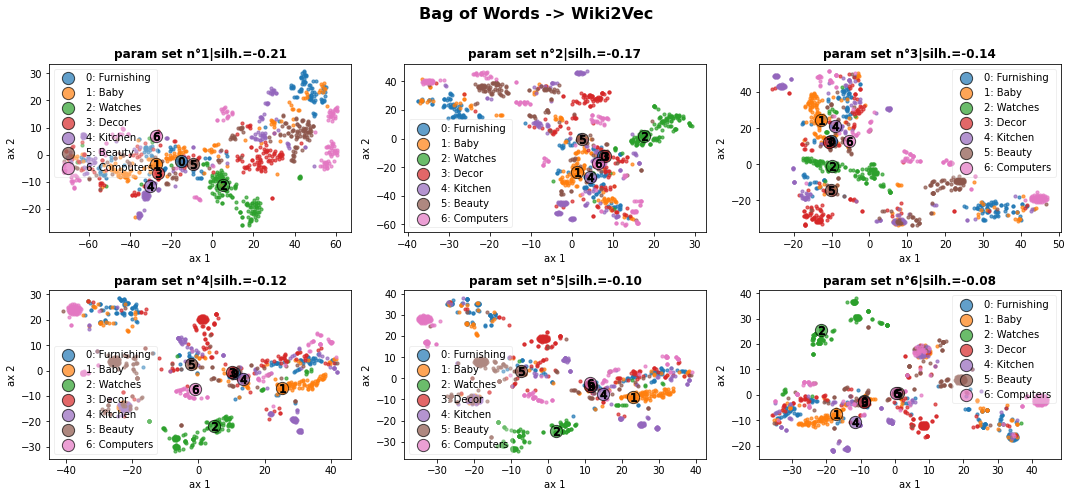

,0,1,2,3,4,5
silh,-0.21,-0.17,-0.14,-0.12,-0.10,-0.08


In [790]:
####### BOW->W2V: min_df#######
ser_categories = pd.Series(df_desc_cat['category'].values, 
                           index=df_desc_cat.index,
                           name='Clust')

# Generates a list of parameters dictionaries
min_df_range = (np.linspace(0,60,6)).astype('int')
params = []
for min_df in min_df_range:
    params.append({'vec_params': {'min_df': min_df, 'stop_words': sw},
                   'tfidf_on': False})

print(f"Range of min_df tested:\n{min_df_range}")
df_scores = plot_grid_proj_params(df_desc_cat['description'],
                                  ser_categories,
                                  params, n_rows=2,
                                  figsize=(15,7),
                                  w2v=wiki2vec,
                                  title='Bag of Words -> Wiki2Vec')

display(df_scores.T)

Range of min_df tested:
[ 0 12 24 36 48 60]


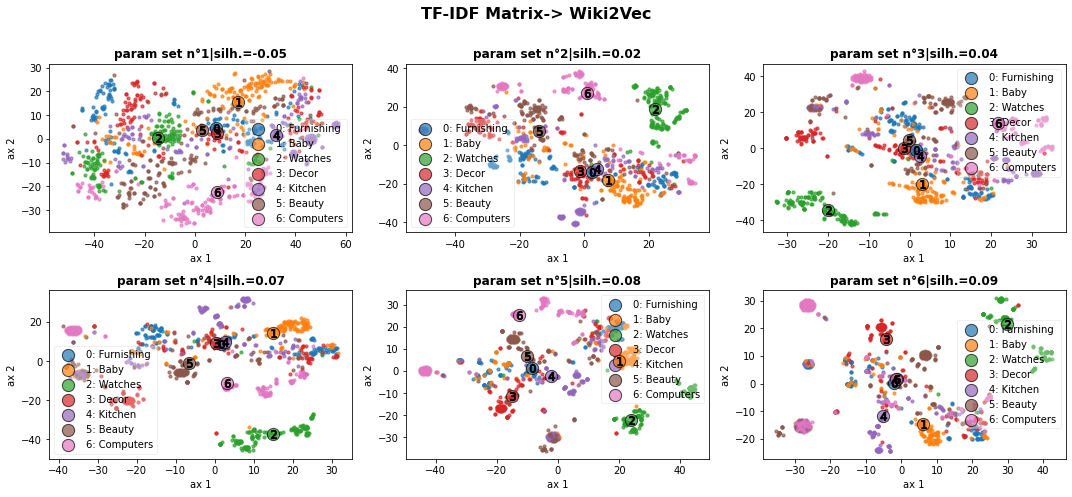

,0,1,2,3,4,5
silh,-0.05,0.02,0.04,0.07,0.08,0.09


In [791]:
####### BOW->W2V: min_df#######
ser_categories = pd.Series(df_desc_cat['category'].values, 
                           index=df_desc_cat.index,
                           name='Clust')

# Generates a list of parameters dictionaries
min_df_range = (np.linspace(0,60,6)).astype('int')
params = []
for min_df in min_df_range:
    params.append({'vec_params': {'min_df': min_df, 'stop_words': sw},
                   'tfidf_on': True})

print(f"Range of min_df tested:\n{min_df_range}")
df_scores = plot_grid_proj_params(df_desc_cat['description'],
                                  ser_categories,
                                  params, n_rows=2,
                                  figsize=(15,7),
                                  w2v=wiki2vec,
                                  title='TF-IDF Matrix-> Wiki2Vec')

display(df_scores.T)

## 5 Topics Modeling

We'll create a dataframe where we'll put the results of the best results of clustering or topics modeling obtained with different techniques.

In [748]:
df_res_clust = pd.DataFrame()
df_res_clust['categories'] = df_desc_cat['category']

### 5.1 Categories Modeling using NMF

In [749]:
# create the model
from sklearn.decomposition import NMF
k=7 # number of categories
nmf = NMF(init="nndsvd",
          n_components=k) 

Preprocessing and vectorization of the data

In [750]:
# Vectorization of the descriptions prior to projection on Wiki2Vec

tf_idf_df, _ = \
    compute_doc_terms_df(df_desc_cat['desc_token_joined'],
                         preproc_func= tokenize_clean,
                         preproc_func_params = {'stopwords': sw,
                                                'stemmer': None},
                         vec_params = {'min_df': 10,
                                       'stop_words': sw},
                         tfidf_on=True)

Let's have a look to the 2 matrices documents/topics ans topics/words

In [751]:
# DOCUMENTS/TOPICS Matrix
W = pd.DataFrame(nmf.fit_transform(tf_idf_df.values),
                 index=tf_idf_df.index, # documents
                 columns=['cat_'+str(i) for i in range(1,k+1)]) # topics
# TOPICS/WORDS Matrix
H = pd.DataFrame(nmf.components_,
                 index=['cat_'+str(i) for i in range(1,k+1)], # topics
                 columns=tf_idf_df.columns) # words
print(W.shape, H.shape)

(1050, 7) (7, 536)


#### Categories descriptors

Let's have a look to the top words for each category.

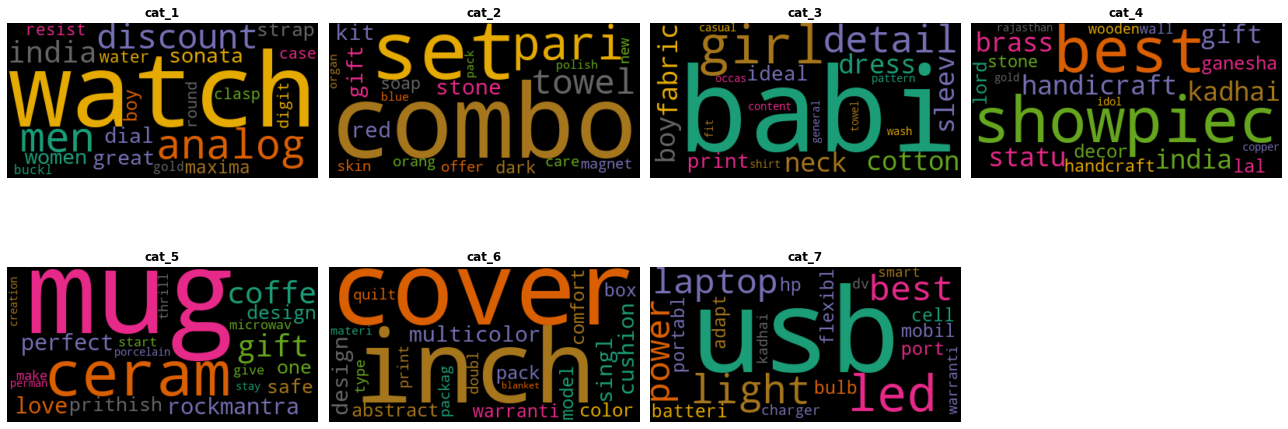

In [752]:
plot_wordclouds_topwords(H, n_top_words=20, n_rows=2)

In [753]:
# printing 10 top words for each topic
for i in H.index:
    print(i, '---', H.loc[i].sort_values(ascending=False)[0:10].index.tolist())
    print(i, '---',
          np.round(H.loc[i].sort_values(ascending=False)[0:10].values.tolist(),2))

cat_1 --- ['watch', 'analog', 'men', 'discount', 'india', 'great', 'women', 'dial', 'sonata', 'strap']
cat_1 --- [1.6  1.39 0.94 0.74 0.72 0.69 0.65 0.38 0.36 0.36]
cat_2 --- ['combo', 'set', 'pari', 'towel', 'stone', 'red', 'gift', 'kit', 'soap', 'dark']
cat_2 --- [2.13 1.98 0.14 0.11 0.11 0.1  0.09 0.08 0.08 0.07]
cat_3 --- ['babi', 'girl', 'detail', 'cotton', 'fabric', 'dress', 'boy', 'sleev', 'neck', 'print']
cat_3 --- [1.37 0.93 0.81 0.77 0.71 0.61 0.53 0.48 0.46 0.38]
cat_4 --- ['showpiec', 'best', 'handicraft', 'statu', 'india', 'kadhai', 'brass', 'gift', 'ganesha', 'lord']
cat_4 --- [2.05 0.94 0.25 0.2  0.16 0.16 0.16 0.12 0.12 0.1 ]
cat_5 --- ['mug', 'ceram', 'coffe', 'gift', 'perfect', 'rockmantra', 'love', 'prithish', 'one', 'design']
cat_5 --- [1.27 0.74 0.43 0.34 0.33 0.33 0.32 0.3  0.29 0.25]
cat_6 --- ['cover', 'inch', 'multicolor', 'singl', 'design', 'cushion', 'pack', 'color', 'abstract', 'comfort']
cat_6 --- [0.51 0.45 0.44 0.42 0.4  0.39 0.39 0.36 0.36 0.36]
cat_7 --

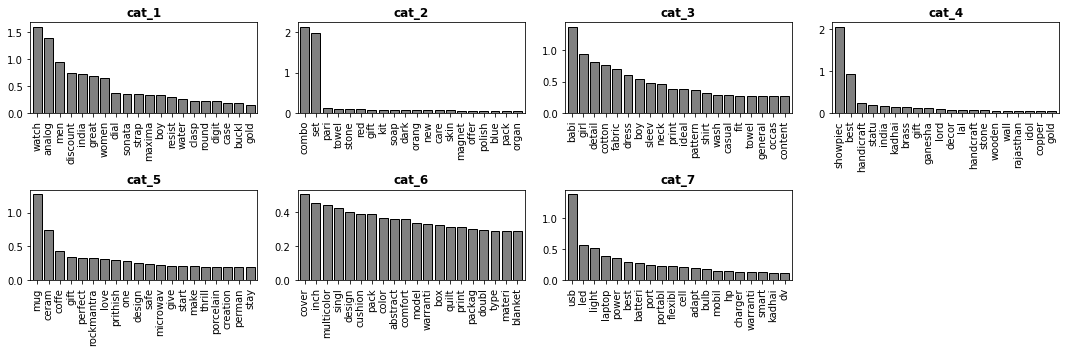

In [754]:
# plotting bar plots fo 20 top words for each topic
n_rows = 2
fig= plt.figure(figsize=(15,5))
for i, cat in enumerate(H.index, 1):
    n_tot = H.shape[0]
    n_cols = n_tot//n_rows + (n_tot%n_rows!=0)*1
    ax=fig.add_subplot(n_rows, n_cols, i)
    H.loc[cat].sort_values(ascending=False).iloc[0:20].plot.bar(color='grey',
                                                                width=0.8,
                                                                ec='k', ax=ax)
    ax.set_title(cat, fontweight='bold')
plt.tight_layout()
plt.show()

#### Most relevant items for each category

In [755]:
# 10 most relevant items for each categories
categories = ['cat_'+str(i) for i in range(1,8)]
for cat in categories:
    ser = W.loc[:,cat].sort_values(ascending=False)[0:10]
    print('-'*20+cat.upper()+'-'*20)
    display(df_desc_cat.loc[ser.index, ['product_name', 'description']])

--------------------CAT_1--------------------


,product_name,description
uniq_id,,
6776795cc4521a0cb0d54059649f7d72,Nexus NX_7668 Analog Watch - For Men,Nexus NX_7668 Analog Watch - For Men - Buy Nexus NX_7668 Analog Watch - For Men NX_7668 Onlin...
4019ad332ca3ce22449ff54fdd49a273,Timewel 1100-N1685 Analog Watch - For Men,Timewel 1100-N1685 Analog Watch - For Men - Buy Timewel 1100-N1685 Analog Watch - For Men 110...
6c53dbd7a9d43744920bfae3bc06327f,Timewel 1100-N31 Analog Watch - For Men,Timewel 1100-N31 Analog Watch - For Men - Buy Timewel 1100-N31 Analog Watch - For Men 1100-N3...
170fdf050c7a1f8d30ef5a98c4216f9c,R.S D&G16 Analog Watch - For Men,R.S D&G16 Analog Watch - For Men - Buy R.S D&G16 Analog Watch - For Men D&G16 Online at Rs.24...
75549ef6adc47e9b6dc2b69f530d9097,LUBA HF45 Stylo Analog Watch - For Men,LUBA HF45 Stylo Analog Watch - For Men - Buy LUBA HF45 Stylo Analog Watch - For Men HF45 Onli...
156bcd3aba1838a2b6bad856654db964,Timewel N1536(GW)_1 Analog Watch - For Men,Timewel N1536(GW)_1 Analog Watch - For Men - Buy Timewel N1536(GW)_1 Analog Watch - For Men N...
2541b59d54a3a9f2681c0049f7ddd85c,Timewel 1100-N145 Analog Watch - For Men,Timewel 1100-N145 Analog Watch - For Men - Buy Timewel 1100-N145 Analog Watch - For Men 1100-...
49658948b5f4eb06a3ddc2fa75eb41d0,Hourglass HG 006 Analog Watch - For Men,Hourglass HG 006 Analog Watch - For Men - Buy Hourglass HG 006 Analog Watch - For Men HG 006 ...
b144a363c107c7bdd91f32d6e28ba6f2,Timewel 1100-N1192 Analog Watch - For Men,Timewel 1100-N1192 Analog Watch - For Men - Buy Timewel 1100-N1192 Analog Watch - For Men 110...


--------------------CAT_2--------------------


,product_name,description
uniq_id,,
67119571e4b46deb266236d8e7fad65d,Denver Rage Hamilton Honour Combo Set,Flipkart.com: Buy Denver Rage Hamilton Honour Combo Set online only for Rs. 379 from Flipkart.co...
a231459c1562ee1117e95a61128820b7,"Denver Cool,Honour Combo Set","Flipkart.com: Buy Denver Cool,Honour Combo Set online only for Rs. 350 from Flipkart.com. Only G..."
50be4cd92fda2755e1e884421a52e345,Denim Deo Combo Set,Flipkart.com: Buy Denim Deo Combo Set online only for Rs. 250 from Flipkart.com. Only Genuine Pr...
387ecd9ec173d61b6dc5ceddc079b150,"Denver Brave,Caliber Combo Set","Flipkart.com: Buy Denver Brave,Caliber Combo Set online only for Rs. 340 from Flipkart.com. Only..."
ab3f4b2d2ec007b7e0eaec213bfdbffc,Engage Tease and Tease Combo Set,Flipkart.com: Buy Engage Tease and Tease Combo Set online only for Rs. 350 from Flipkart.com. On...
f2fa99bfaa4aa65a2bd53337e140f949,Archies VJ-580 Combo Set,Flipkart.com: Buy Archies VJ-580 Combo Set online only for Rs. 399 from Flipkart.com. Only Genui...
955abcd11312fce2fd02a91a9b05ae71,"Engage Rush , Jump Combo Set","Flipkart.com: Buy Engage Rush , Jump Combo Set online only for Rs. 331 from Flipkart.com. Only G..."
15f45d08050e8ba24a14804cba000589,Denver Hamilton Pride Combo Set,Flipkart.com: Buy Denver Hamilton Pride Combo Set online only for Rs. 350 from Flipkart.com. Onl...
4c096ad79f63c12a42f56fe8cec37f36,Adidas Ice Dive Combo Set,Flipkart.com: Buy Adidas Ice Dive Combo Set online only for Rs. 380 from Flipkart.com. Only Genu...


--------------------CAT_3--------------------


,product_name,description
uniq_id,,
7f7c64d439d64656d6baa40f5798cdf5,"Kandyfloss Baby Boy's, Baby Girl's Romper","Key Features of Kandyfloss Baby Boy's, Baby Girl's Romper Fabric: COTTON Brand Color: RED,Specif..."
6e812fbc03331ab363789b0f2d6b3ff2,Titrit Baby Girl's Gathered Dress,Key Features of Titrit Baby Girl's Gathered Dress Baby Frock With Shrug And Legging Material Cot...
aa41433dfba2c7561fa30be3fed1e8f0,Young Birds Baby Girl's Fit and Flare Dress,Specifications of Young Birds Baby Girl's Fit and Flare Dress Dimensions Length Mini/Short Gener...
68b32e026c109c1bae017d024dd8f590,MKB Baby Girl's Empire Waist Dress,Key Features of MKB Baby Girl's Empire Waist Dress Material: 100% Cotton Yellow Flower Print Len...
8a184fe2c82ba6a17fbe07f94d0dd875,"chota packet Baby Boy's, Baby Girl's Bodysuit","Specifications of chota packet Baby Boy's, Baby Girl's Bodysuit General Details Sleeve Half slee..."
27b7851ae3dfc2ae8c1958cebe93bf0b,Fs Mini Klub Printed Baby Boy's Round Neck T-Shirt,Specifications of Fs Mini Klub Printed Baby Boy's Round Neck T-Shirt T-shirt Details Sleeve Shor...
c6f4475e2385cc16ce83f21f975614b3,Rute Baby Girl's Sleepsuit,"Key Features of Rute Baby Girl's Sleepsuit Fabric: Cotton Brand Color: Pink,Rute Baby Girl's Sle..."
c2efa8aa11898bdb5fc4e46201973a42,Baby Moshai Baby Girl's A-line Dress,"Key Features of Baby Moshai Baby Girl's A-line Dress Commendable design,Baby Moshai Baby Girl's ..."
967d91e162afb44a67c0281f71766e4d,FS Mini Klub Baby Girl's Bodysuit,"Key Features of FS Mini Klub Baby Girl's Bodysuit Fabric: Cotton Brand Color: GREEN,Specificatio..."


--------------------CAT_4--------------------


,product_name,description
uniq_id,,
a554abb9699959ec78425eac2b997c27,NEHP NEH0012 Showpiece - 22.86 cm,Buy NEHP NEH0012 Showpiece - 22.86 cm for Rs.699 online. NEHP NEH0012 Showpiece - 22.86 cm a...
45d0af2c709de47268c80c35a117de44,Malhar Niko Male Doll Showpiece - 25 cm,Buy Malhar Niko Male Doll Showpiece - 25 cm for Rs.5436 online. Malhar Niko Male Doll Showpiec...
9833d0de7f7e1927c807411c10b19189,Ruchikainternational ruc0015 Showpiece - 4 cm,Buy Ruchikainternational ruc0015 Showpiece - 4 cm for Rs.499 online. Ruchikainternational ruc0...
908cc351957d02f72f60916006c531ba,Rajo Raja Mahavastu Buddha Artpiece Showpiece - 20.5 cm,Buy Rajo Raja Mahavastu Buddha Artpiece Showpiece - 20.5 cm for Rs.1799 online. Rajo Raja Maha...
5b378b0925d5409b5d84ceb416fc2afc,Purpledip Showpiece - 12 cm,Buy Purpledip Showpiece - 12 cm for Rs.638 online. Purpledip Showpiece - 12 cm at best price...
7ee2e665b7de2e1cc29e3c65bde0c318,Mavi 237MBB Showpiece - 15 cm,Buy Mavi 237MBB Showpiece - 15 cm for Rs.1290 online. Mavi 237MBB Showpiece - 15 cm at best ...
0f7a56876c61ba98dfed48ede5d3f3e1,Ruchikainternational ruc0013 Showpiece - 13 cm,Buy Ruchikainternational ruc0013 Showpiece - 13 cm for Rs.549 online. Ruchikainternational ruc...
2f756aa2ceb1efda609c428a47308758,NEHP NEH006 Showpiece - 38.1 cm,Buy NEHP NEH006 Showpiece - 38.1 cm for Rs.499 online. NEHP NEH006 Showpiece - 38.1 cm at be...
7729e54756a60aecb2067a747c890913,Golmaalshop Showpiece - 12.7 cm,Buy Golmaalshop Showpiece - 12.7 cm for Rs.649 online. Golmaalshop Showpiece - 12.7 cm at be...


--------------------CAT_5--------------------


,product_name,description
uniq_id,,
8507eb0ef32c1c0db700f20aad6d9bcd,Rockmantra Sonakshi Sinha Beautiful Look Ceramic Mug,Rockmantra Sonakshi Sinha Beautiful Look Ceramic Mug (5.5 l)\r\n Price: ...
7956d9586de3e25ff586bca58be7195e,Rockmantra 3d Flawers 2 Ceramic Mug,Rockmantra 3d Flawers 2 Ceramic Mug (5.5 l)\r\n Price: Rs. 199\r\n\t\t\t...
8bf65b132179faf26f61e26274b2b819,Rockmantra Gamming Wallpaper Ceramic Mug,Rockmantra Gamming Wallpaper Ceramic Mug (5.5 l)\r\n Price: Rs. 349\r\n\...
f8794f7a06b530782c66f7c0911bb437,Rockmantra Fantasy ArtRMMW50000330 Ceramic Mug,Rockmantra Fantasy ArtRMMW50000330 Ceramic Mug (5.5 l)\r\n Price: Rs. 19...
c5590e238d44b370337624f5987fb9b8,Rockmantra Abstrcts 8 Ceramic Mug,Rockmantra Abstrcts 8 Ceramic Mug (5.5 l)\r\n Price: Rs. 199\r\n\t\t\t\t...
202fc276e672eb8c29891aa50aef0771,Rockmantra Fogg Tree Ceramic Mug,Rockmantra Fogg Tree Ceramic Mug (5.5 l)\r\n Price: Rs. 199\r\n\t\t\t\t\...
3847353a4b8de1efc504d589aea74ffe,Rockmantra Tele PhoneRMMW50000160 Ceramic Mug,Rockmantra Tele PhoneRMMW50000160 Ceramic Mug (5.5 l)\r\n Price: Rs. 199...
c8f42da0f9f695f07067676eae4135c8,Rockmantra Colorful Ceramic Mug,Rockmantra Colorful Ceramic Mug (5.5 l)\r\n Price: Rs. 199\r\n\t\t\t\t\r...
6b043b37c38f081d96886acb5acfbdf5,Rockmantra Water Fire Ceramic Mug,Rockmantra Water Fire Ceramic Mug (5.5 l)\r\n Price: Rs. 199\r\n\t\t\t\t...


--------------------CAT_6--------------------


,product_name,description
uniq_id,,
66191b4a311b5d9babfc00a71ef97c5b,JMD Printed Cushions Cover,"Key Features of JMD Printed Cushions Cover Printed 40x40cm size Made of Cotton,Specifications of..."
2231a6fc63274c46043e353f1728f077,Tidy Printed Cushions Cover,"Key Features of Tidy Printed Cushions Cover 100% Pure Cotton High Quality Excellent Design,Speci..."
7cbbe686c4a233e8cf53528748f75223,Remtex Export Cartoon Single Dohar Multicolor,Specifications of Remtex Export Cartoon Single Dohar Multicolor (1 Dohar) In the Box Sales Packa...
0a8a1e9c6659361c0c2b247f8a6471d0,Jaipur Print Cotton Floral Diwan Set,"Key Features of Jaipur Print Cotton Floral Diwan Set fast colour hand printed superior Quality,J..."
a79117ea49a0533f641facdb4c99f502,Kripa's Printed Cushions Cover,"Key Features of Kripa's Printed Cushions Cover Length 45 cm Width 45 cm,Specifications of Kripa'..."
f2658bad8c2b7d5b08984c6ac34267f7,Prime Printed 8 Seater Table Cover,"Key Features of Prime Printed 8 Seater Table Cover Length 90 inch/228 cm Width 60 inch/152 cm,Pr..."
707b160df4c4dece6cde52b222ce624b,Prime Printed 4 Seater Table Cover,"Key Features of Prime Printed 4 Seater Table Cover Length 60 inch/152 cm Width 40 inch/101 cm,Pr..."
6eaa9bd9e9285d77891bb76d30e6ebe7,Aroma Comfort Polyester Blue Floral Eyelet Long Door Curtain,Specifications of Aroma Comfort Polyester Blue Floral Eyelet Long Door Curtain (274 cm in Height...
90906358dac904c4f05c12c798ac5221,Aroma Comfort Polyester Brown Printed Eyelet Window Curtain,Key Features of Aroma Comfort Polyester Brown Printed Eyelet Window Curtain Height: 182 cm Width...


--------------------CAT_7--------------------


,product_name,description
uniq_id,,
00ed03657cedbe4663eff2d7fa702a33,"Crystle Crystle01 CRSTL - Bluecensor USB Led Light, USB Cable","Buy Crystle Crystle01 CRSTL - Bluecensor USB Led Light, USB Cable for Rs.199 online. Crystle Cry..."
e86daf9ebcdfc5c5dd088cdb7f8f8db6,Epresent Mfan 1 Fan USB USB Fan,Buy Epresent Mfan 1 Fan USB USB Fan for Rs.219 online. Epresent Mfan 1 Fan USB USB Fan at best p...
95b0779b1a04ab70d62c72b53090c4b3,Orico USB 3.0 Hub with Card Reader H3TS-U3-BK USB USB Hub,Buy Orico USB 3.0 Hub with Card Reader H3TS-U3-BK USB USB Hub for Rs.1490 online. Orico USB 3.0 ...
ad08a6efe82576ab162a9336feff647f,Kensington 33399EU USB USB Hub,Buy Kensington 33399EU USB HUB for Rs.549 online. Kensington 33399EU USB HUB at best prices with...
832a66ce379b4c98fd3d748eebd7ae4c,Techone+ Portable SE122103-WHITE USB Led Light,Techone+ Portable SE122103-WHITE USB Led Light (White)\r\n Price: Rs. 44...
e426290a8f57e82680275bb91df91ad1,Techone+ Flexible SE122103-GREEN USB Led Light,Techone+ Flexible SE122103-GREEN USB Led Light (Green)\r\n Price: Rs. 44...
fc009e0b404034e5ea065ba980917f33,"Techone+ Portable Power Bank, and Laptops_2 set USB Led Light","Buy Techone+ Portable Power Bank, and Laptops_2 set USB Led Light for Rs.138 online. Techone+ Po..."
146b0d570d5ab4e27629d48533b7680d,RRP Lamp For Computer Keyboard Tslplt02 USB Led Light,RRP Lamp For Computer Keyboard Tslplt02 USB Led Light (Green)\r\n Price:...
812bfd40e47dfde2ff5326e899b42577,RRP Born To Have Lxs-001 USB Led Light,RRP Born To Have Lxs-001 USB Led Light (Purple)\r\n Price: Rs. 99\r\n\t\...


In [756]:
# Appending the best results of the NMF topics modeling 
df_res_clust['NMF_tfidf'] = W.idxmax(1)

In [758]:
df_res_clust.sample(5)

,categories,NMF_tfidf
af13232271963742c118a1c58affa259,Decor,cat_4
07912328f580cf080d721e6466287896,Decor,cat_6
7cdc62f8d3f7ab8b9d2dddc14c86de83,Computers,cat_7
60efd61370e70267dc60b11ff2bf974c,Kitchen,cat_5
57578c1e6ec61a880a6f3f971f5f77b8,Decor,cat_6


### 5.2 Categories modeling with LDA

### 5.3 Categories modeling with LSI

### 5.4 KMeans Clustering

#### Clustering on BOW and TF-IDF matrices

#### Clustering on Word2vec embedding

#### Clustering on NMF selected features

#### Clustering on LDA selected features

### 5.5 Comparison of clusters labels with true categories

In [760]:
from sklearn.metrics import adjusted_rand_score

In [763]:
df_res_clust.columns

Index(['categories', 'NMF_tfidf'], dtype='object')

In [766]:
adjusted_rand_score(df_res_clust['categories'],
                    df_res_clust['NMF_tfidf'])

0.3814818069719561

###

- calcul de la pertinence des catégories trouvées par rapport aux catégories initiales et représentation graphique

- optimisation du nombre de catégories par mesure de la cohérence des mots les plus représentatifs de chaque catégorie (nécessite d'entraîner un modèle word2vec)
- représentation des catégories (des mots les plus représentatifs qui les composent) avec t-SNE
- essai direct de clustering sur la représentation des mots par Word2Vec

- Latent Dirichlet Allocation pour trouver d'autres clusters

- comment mettre en place un vote permettant d'aggréger le résultat de plusieurs clusterings différents lorsque les catégories n'ont pas les mêmes numéros ? 

## Exportation

Now we export the dataset of aggregated orders in a .csv file.

In [ ]:
dfs['ord_it'].to_csv('agg_order_items.csv')